### **PROJECT 2 PROPOSAL LEVEL 2**


**Idea: Wine Quality Prediction**


 **Description:**


The focus is on predicting the quality of wine based on its chemical characteristics, offering a real-world application of machine learning in the context of viticulture. The dataset encompasses diverse chemical attributes, including density and acidity, which serve as the features for three distinct classifier models.


 **Dataset:-** https://www.kaggle.com/datasets/yasserh/wine-quality-dataset


 **Key Concepts and Challenges:**


1. Classifier Models: Utilizing Random Forest, Stochastic Gradient Descent, and Support Vector Classifier (SVC) for wine quality prediction.


2. Chemical Qualities: Analyzing features like density and acidity as predictors for wine quality.


3. Data Analysis Libraries: Employing Pandas for data manipulation and Numpy for array operations.


4. Data Visualization: Using Seaborn and Matplotlib for visualizing patterns and insights in the dataset

In [24]:
#  Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [25]:
#  Load the Dataset
df = pd.read_csv("WineQT.csv")
df.drop(columns=['Id'], inplace=True)

In [26]:
# Basic Info
print("\nDataset Shape:", df.shape)
print("\nDataset Columns:\n", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (1143, 12)

Dataset Columns:
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


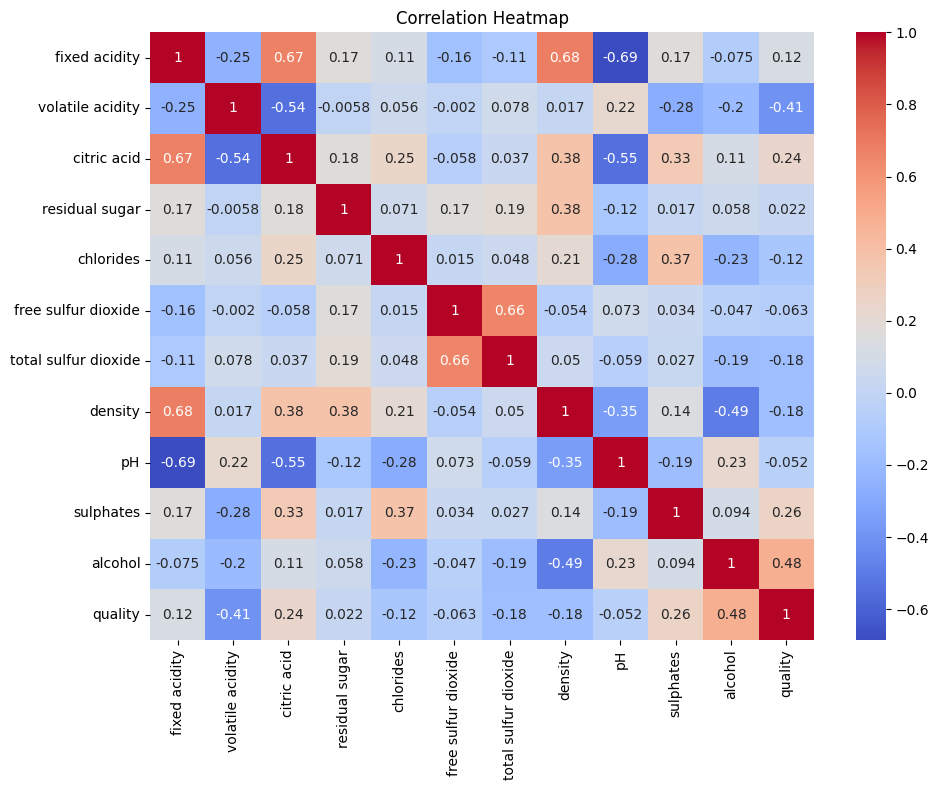

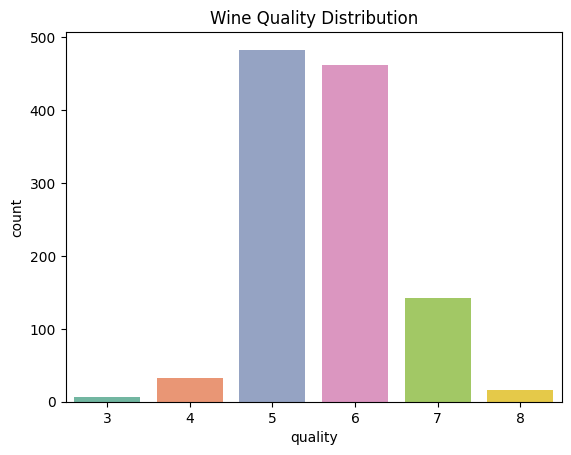

In [27]:
#  Exploratory Data Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

sns.countplot(x='quality', hue='quality', data=df, palette="Set2", legend=False)
plt.title("Wine Quality Distribution")
plt.show()

In [28]:
#  Preprocessing
X = df.drop("quality", axis=1)
y = df["quality"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
# Train Classifier Models
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SGD Classifier": SGDClassifier(class_weight='balanced', random_state=42),
    "SVC": SVC(class_weight='balanced', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))


Model: Random Forest
Accuracy: 0.6769
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.70      0.80      0.75        97
           6       0.63      0.67      0.65        92
           7       0.74      0.48      0.58        29
           8       1.00      0.33      0.50         3

    accuracy                           0.68       229
   macro avg       0.51      0.38      0.41       229
weighted avg       0.66      0.68      0.66       229


Model: SGD Classifier
Accuracy: 0.4323
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.14      0.12         7
           5       0.58      0.69      0.63        97
           6       0.54      0.23      0.32        92
           7       0.22      0.28      0.24        29
     

In [30]:
#  Hyperparameter Tuning - Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1)
gs_rf.fit(X_train, y_train)
print("\nBest Random Forest Parameters:", gs_rf.best_params_)
y_pred_rf = gs_rf.predict(X_test)
print("\nTuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 150}

Tuned Random Forest Accuracy: 0.7030567685589519


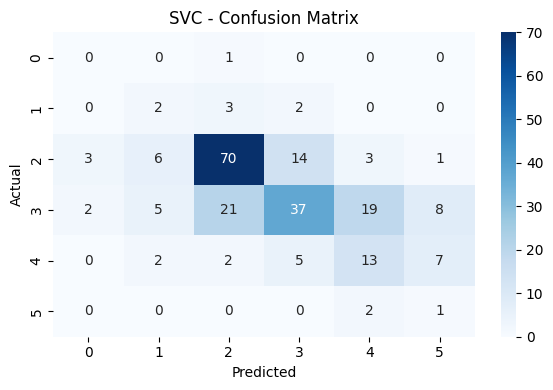

In [31]:
 # Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title(f"{name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()